In [1]:
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy.ndimage


Using TensorFlow backend.


In [2]:
img_width, img_height = 100, 100

train_data_dir = 'new_dataset/Dataset/train'
test_data_dir = 'new_dataset/Dataset/test'
test_data_path = 'new_dataset/Dataset/final'

In [3]:

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
#full connection
model.add(Dense(output_dim=120,activation='relu'))

import tensorflow as tf
model.add(Dense(output_dim=23,activation=tf.nn.softmax))

#sgd = keras.optimizers.SGD(lr=0.3)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


C:\Users\Noah\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(100, 100,...)`
  app.launch_new_instance()
C:\Users\Noah\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
C:\Users\Noah\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=120)`
C:\Users\Noah\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation=<function ..., units=23)`


In [10]:
datagen = ImageDataGenerator(rescale=1./255)
#augmentation  
train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        horizontal_flip=True)  # randomly flip the images


In [6]:
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
       class_mode='categorical')

Found 16641 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


In [7]:
nb_epoch =20
nb_train_samples = 14057
nb_test_samples = 4002

In [9]:
history=model.fit_generator(
        train_generator_augmented,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=test_generator,
        nb_val_samples=nb_test_samples)

C:\Users\Noah\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\Noah\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., validation_steps=4002, epochs=20, steps_per_epoch=439)`


Epoch 1/20
439/439 [==============================] - 2857s - loss: 0.1649 - acc: 0.9569 - val_loss: 0.1622 - val_acc: 0.9569
Epoch 2/20
439/439 [==============================] - 2338s - loss: 0.1580 - acc: 0.9572 - val_loss: 0.1597 - val_acc: 0.9570
Epoch 3/20
439/439 [==============================] - 2332s - loss: 0.1535 - acc: 0.9577 - val_loss: 0.1540 - val_acc: 0.9576
Epoch 4/20
439/439 [==============================] - 2321s - loss: 0.1506 - acc: 0.9580 - val_loss: 0.1539 - val_acc: 0.9575
Epoch 5/20
439/439 [==============================] - 2328s - loss: 0.1469 - acc: 0.9583 - val_loss: 0.1506 - val_acc: 0.9578
Epoch 6/20
439/439 [==============================] - 2329s - loss: 0.1458 - acc: 0.9584 - val_loss: 0.1514 - val_acc: 0.9578
Epoch 7/20
439/439 [==============================] - 2329s - loss: 0.1428 - acc: 0.9587 - val_loss: 0.1517 - val_acc: 0.9576
Epoch 8/20
439/439 [==============================] - 2302s - loss: 0.1418 - acc: 0.9589 - val_loss: 0.1497 - val_acc:

In [11]:
model.save('models/jupyter_model.h5')
#model.save_weights('models/basic_cnn_20_epochs_96.h5')


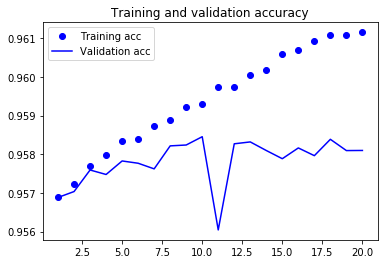

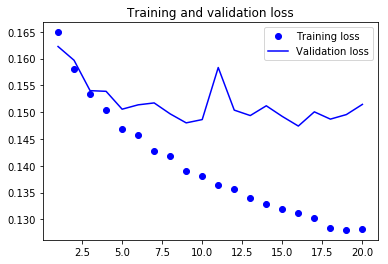

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
